In [12]:
from md import movement_deltas
from sntp import shot_number_to_player
from shot_data import shot_data
from probability_map import Processor
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def apap(point,meshtype = 1):
	if meshtype not in p.meshes:
		p.probability_mesh(meshtype)
	mesh = p.meshes[meshtype]
	t = tuple(p._snap_to_lattice(point,meshtype))
	return mesh[t] if t in mesh else 100000000

def ave(li): return sum(li)/len(li)

In [2]:
p = Processor(shot_data);
mesh = p.probability_mesh();

[-4. -1.]
[ 3. 12.]
[-25.   -5.1]
[25.  85.5]


In [5]:
data={}
for i in range(0,len(movement_deltas),4):
    shot_number = i//4+1;
    if shot_number not in shot_number_to_player:
        continue
    player = shot_number_to_player[shot_number];
    if player not in data:data[player] = [];
    before_x = movement_deltas[i];before_y = movement_deltas[i+1];after_x = movement_deltas[i+2];after_y = movement_deltas[i+3]
    before_point = np.array([before_y-25,before_x])
    after_point  = np.array([after_y-25,after_x])
    before_p = apap(before_point);
    after_p = apap(after_point)
    if before_p < 2 and after_p < 2:
        data[player].append(after_p-before_p)

In [9]:
gradient_data = {q[0]:ave(q[1]) for q in data.items() if len(q[1])>100};

In [10]:
players = list(gradient_data.items())
players.sort(key = lambda x: gradient_data[x[0]])

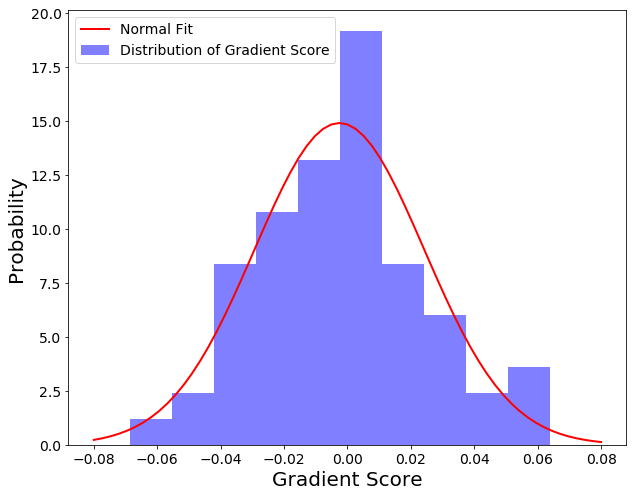

In [33]:
plot_data = gradient_data.values()
plt.figure(figsize = (10,8))
plt.hist(plot_data, normed=True, color="b", alpha=0.5, label="Distribution of Gradient Score")
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(plot_data))

# lets try the normal distribution first
m, s = stats.norm.fit(plot_data) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, color="r", linewidth=2.0, label="Normal Fit") # plot
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Gradient Score", fontsize=20)
plt.ylabel("Probability", fontsize=20)
plt.savefig("gradient_distribution.png", dpi=500, bbox_inches="tight")
plt.show()